**PROJECT: LOAN APPROVAL ANALYSIS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno

**LOAD THE DATA**

In [221]:
df=pd.read_csv("../DataSets/LP_Train.csv")

In [223]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**1] HANDLING MISSING DATA & FILL/DROP MISSING VALUES**

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.Dependents=df.Dependents.fillna(0)

In [11]:
df.Dependents.isnull().sum()

0

In [12]:
df.Dependents=df.Dependents.replace("[+]","",regex=True).astype("int64")

In [13]:
df.Dependents

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [14]:
df.Dependents.unique()

array([0, 1, 2, 3], dtype=int64)

**2.HANDLING MISSING DATA**

In [16]:
df.LoanAmount=df.LoanAmount.fillna(0)

In [17]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(0)

In [18]:
df.Credit_History=df.Credit_History.fillna(0)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df.Gender=df.Gender.fillna("Female")
df.Married=df.Married.fillna("Yes")
df.Self_Employed=df.Self_Employed.fillna("Yes")

In [21]:
df.columns.unique()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
df.Married.value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


 **Task 1: Data Exploration**

 **Descriptive statistics(mean,median,mode,measures of dispersion,etc.) on numerical columns like ApplicantIncome,
 CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History.**

**1.MEAN,MEDIAN,MODE**


**1]MEAN**

In [28]:
s=[]
for i in df.columns.tolist():
    if df[i].dtypes!="object":
        s.append(i)

In [29]:
s

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [30]:
for j in s:
    print(j)
    print(df[j].mean())
    print("")

Dependents
0.744299674267101

ApplicantIncome
5403.459283387622

CoapplicantIncome
1621.2457980271008

LoanAmount
141.16612377850163

Loan_Amount_Term
334.20195439739416

Credit_History
0.7736156351791531



**2]MEDIAN**

In [32]:
s=[]
for i in df.columns.tolist():
    if df[i].dtypes!="object":
        s.append(i)

In [33]:
s

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [34]:
for j in s:
    print(j)
    print(df[j].median())
    print("")

Dependents
0.0

ApplicantIncome
3812.5

CoapplicantIncome
1188.5

LoanAmount
125.0

Loan_Amount_Term
360.0

Credit_History
1.0



**3]MODE**

In [36]:
s=[]
for i in df.columns.tolist():
    if df[i].dtypes!="object":
        s.append(i)

In [37]:
s

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [38]:
for j in s:
    print(j)
    print(df[j].mode())
    print("")

Dependents
0    0
Name: Dependents, dtype: int64

ApplicantIncome
0    2500
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
0    0.0
Name: CoapplicantIncome, dtype: float64

LoanAmount
0    0.0
Name: LoanAmount, dtype: float64

Loan_Amount_Term
0    360.0
Name: Loan_Amount_Term, dtype: float64

Credit_History
0    1.0
Name: Credit_History, dtype: float64



**MEASURES OF DISPERSION**

**1].RANGE,STD AND VARIANCE**

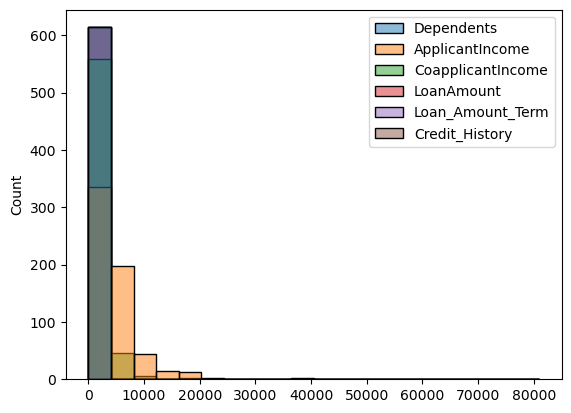

In [41]:
sb.histplot(df,bins=20)
plt.show()

In [42]:
df.ApplicantIncome.std()

6109.041673387174

In [43]:
df.ApplicantIncome.var()

37320390.167181164

In [44]:
df.CoapplicantIncome.std()

2926.2483692241917

In [45]:
df.CoapplicantIncome.var()

8562929.518387241

In [46]:
df.LoanAmount.std()

88.3406303719299

In [47]:
df.LoanAmount.var()

7804.066974509945

In [48]:
df.Loan_Amount_Term.std()

82.18388403769698

In [49]:
df.Loan_Amount_Term.var()

6754.190795521626

In [50]:
df.Credit_History.std()

0.4188319290744672

In [51]:
df.Credit_History.var()

0.1754201848122395

**VISUAL & IDENTIFY MISSING VALUES**

<Axes: >

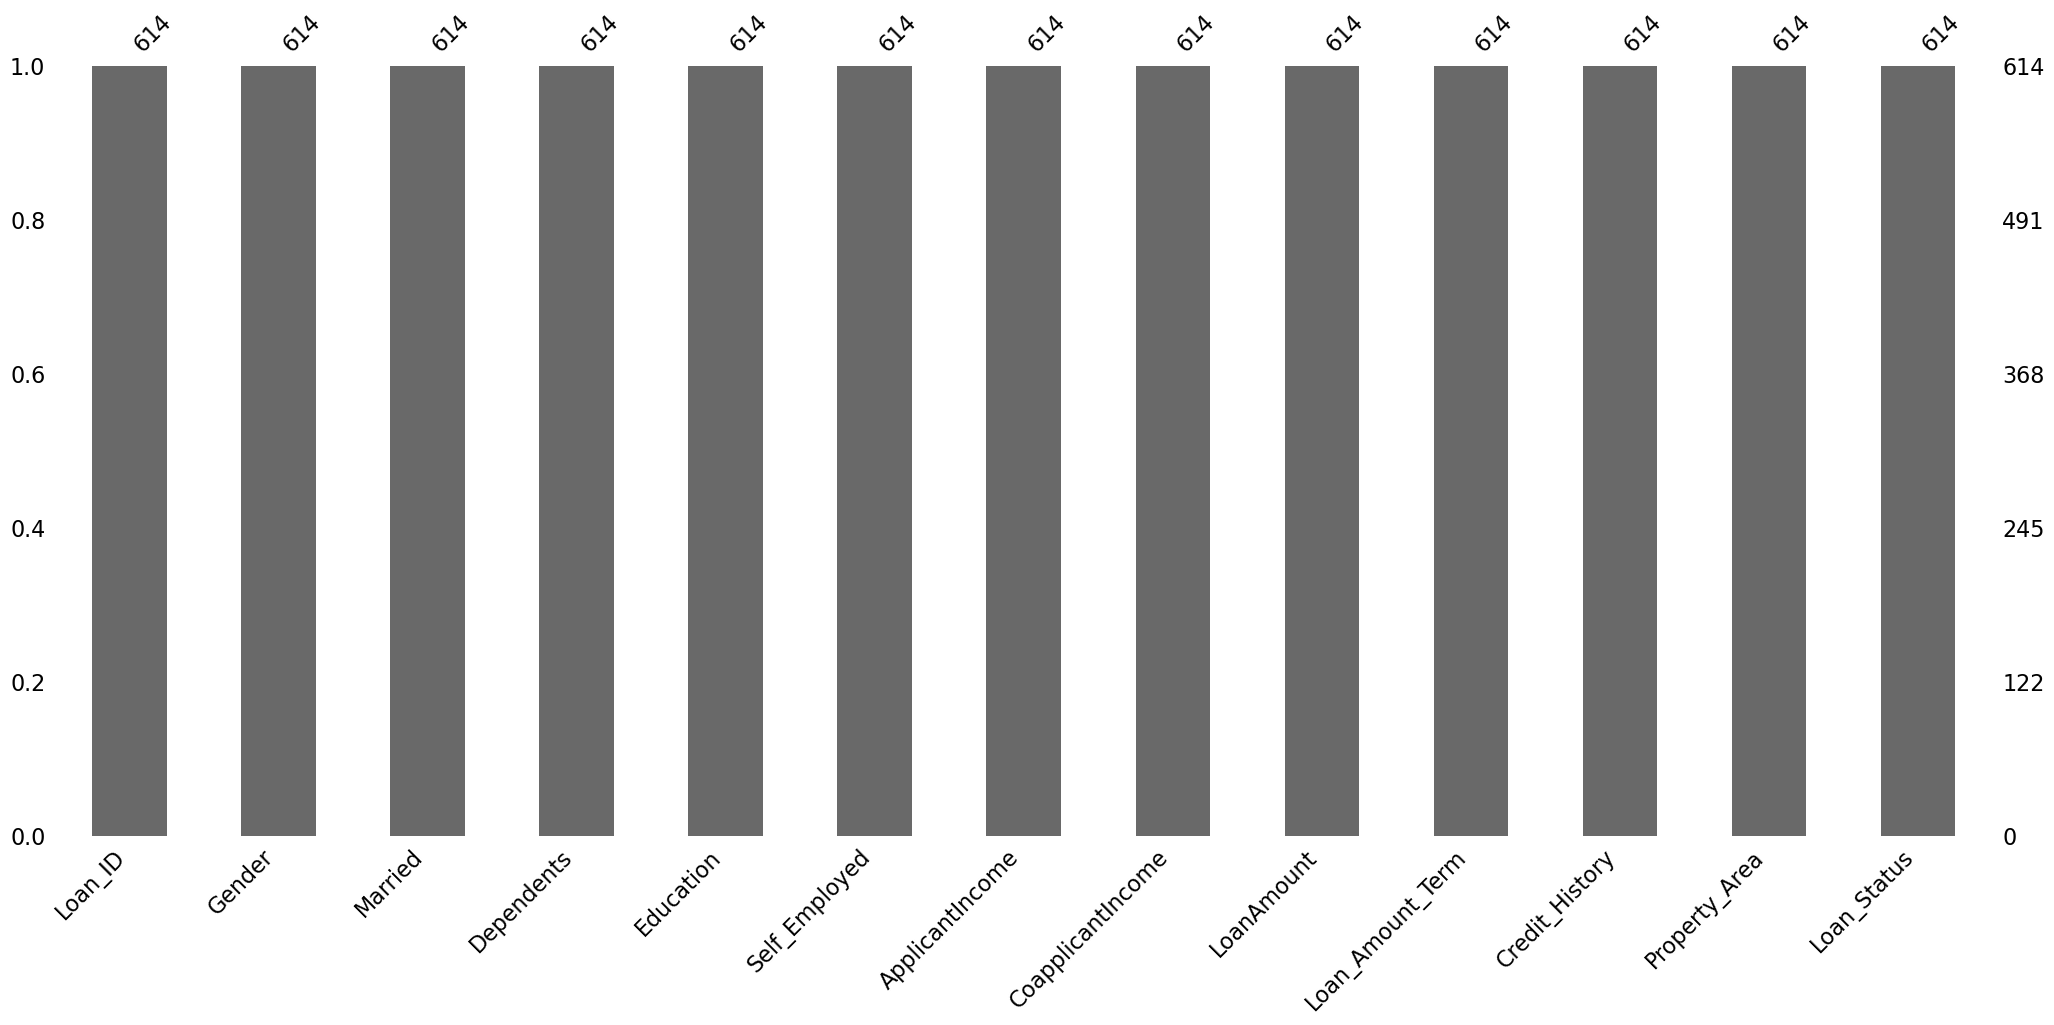

In [53]:
msno.bar(df)

**From Above The missingno library in Python is used for visualizing and handling missing data.**

***Analyze the distribution(unique,count,etc) of categorical columns like Gender, Married,
 Dependents, Education, Self_Employed, Property_Area etc.**

In [57]:
s=[]
for i in df.columns.tolist():
    if df[i].dtypes=="object":
        s.append(i)

In [58]:
s

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [59]:
for j in s:
    print(j)
    print(df[j].unique())
    print("")

Loan_ID
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

Loan_ID


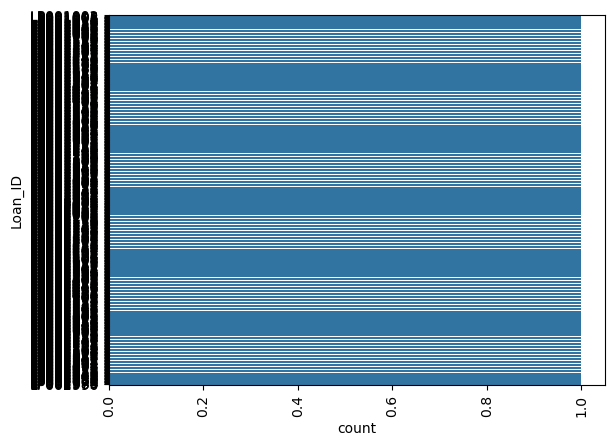

Gender


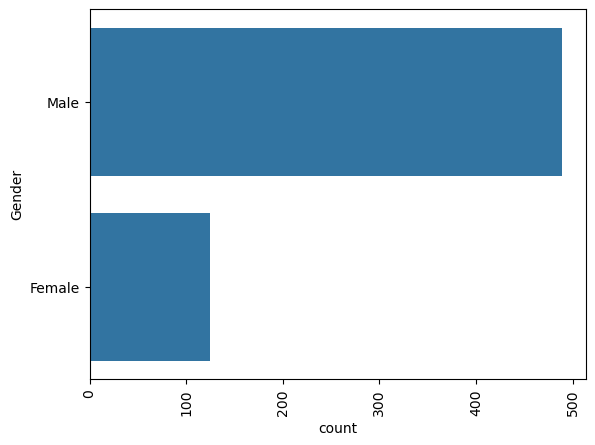

Married


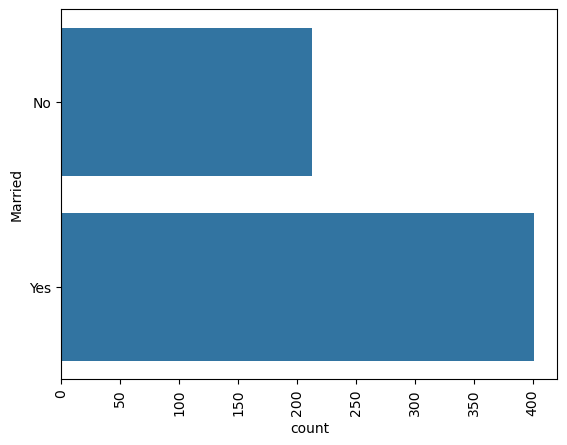

Education


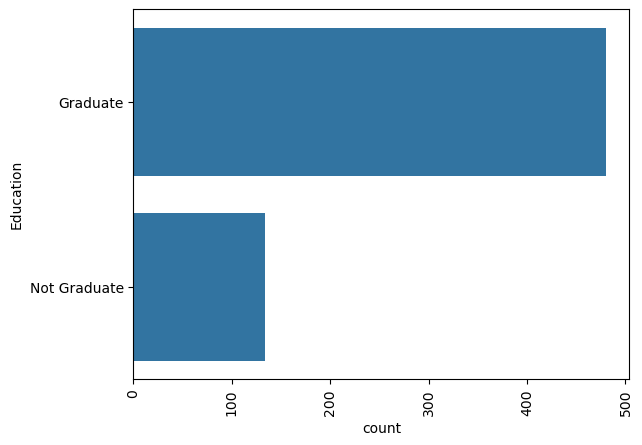

Self_Employed


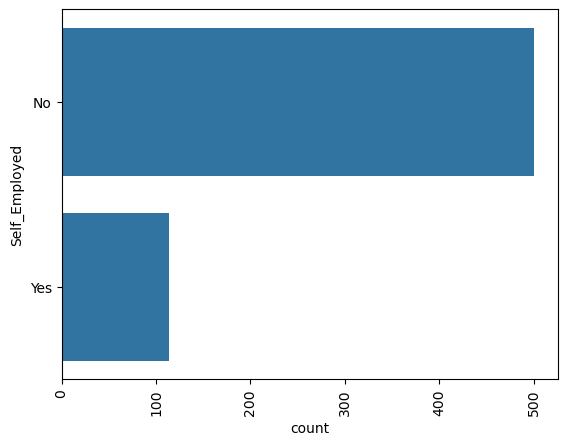

Property_Area


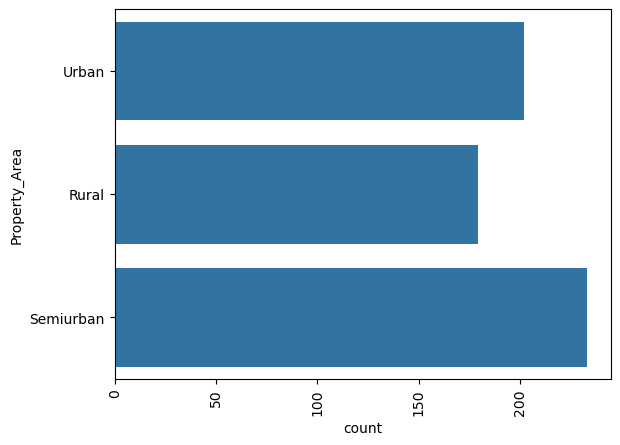

Loan_Status


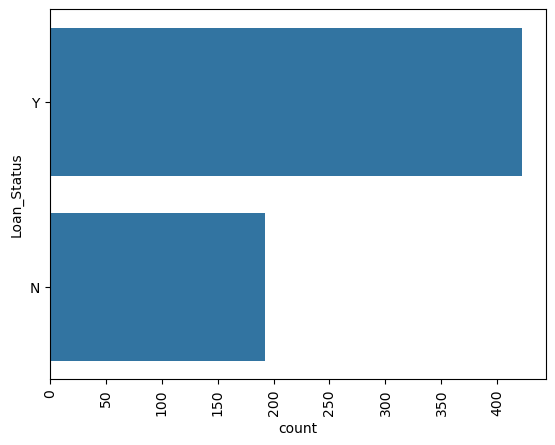

In [60]:
for w in ['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:
    print(w)
    sb.countplot(df[w])
    plt.xticks(rotation=90)
    plt.show()

 **Task 3: Demographic Analysis**


***visualize the relationship between loan approval and gender using Bar Plot**

In [63]:
b=df.groupby(["Gender","Loan_Status"]).size().reset_index(name='count')

In [64]:
b

,Gender,Loan_Status,count
0,Female,N,42
1,Female,Y,83
2,Male,N,150
3,Male,Y,339


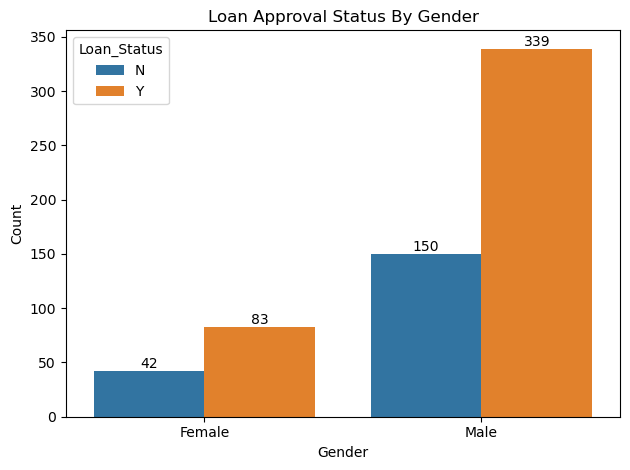

In [65]:
s=sb.barplot(b,x="Gender",y="count",hue="Loan_Status")
s.bar_label(s.containers[0])
s.bar_label(s.containers[1])
plt.title('Loan Approval Status By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()

 **Above Bar Plot Displays how loan approvals vary for different genders.**  
**Based on Above information:-**

Only 83 Female have Approved & 42 female Denied Loan out of 614 peoples

while 339 male approved & 150 Male Denied out of 614.

***analyse How marital status affects loan approval rates.**

In [68]:
approval_rates = df.groupby(['Married', 'Loan_Status']).size().unstack()

In [69]:
approval_rates

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [70]:
approval_rates = df.groupby(['Married', 'Loan_Status']).size().unstack()
approval_rates['Approval_Rate'] = approval_rates['Y'] / approval_rates.count(axis=1)
print(approval_rates)

Loan_Status    N    Y  Approval_Rate
Married                             
No            79  134           67.0
Yes          113  288          144.0


C:\Users\asus\AppData\Local\Temp\ipykernel_36964\987903668.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sb.barplot(x=approval_rates['Approval_Rate'].index,y=approval_rates['Approval_Rate'].values,palette="Set2")


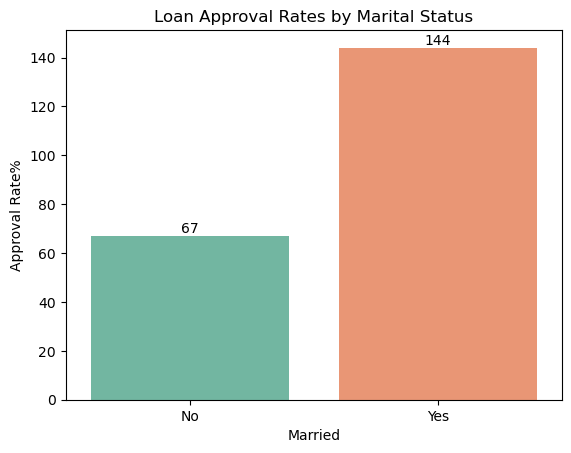

In [71]:
a=sb.barplot(x=approval_rates['Approval_Rate'].index,y=approval_rates['Approval_Rate'].values,palette="Set2")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title('Loan Approval Rates by Marital Status')
plt.xlabel('Married')
plt.ylabel('Approval Rate%')
plt.show()

**Based on Above Information:**

The Approval Rate of Married People is 144% while
the Approval Rate of Unmarried People is 67%.

Thus Above Barplot hepls to visualize the Approval Rate of Married are greater than unmarried People.

In [73]:
z=df.groupby("Loan_Status")["Dependents"].sum().reset_index()

In [74]:
z

,Loan_Status,Dependents
0,N,140
1,Y,317


***Loan Approval By No. Of Dependents.**

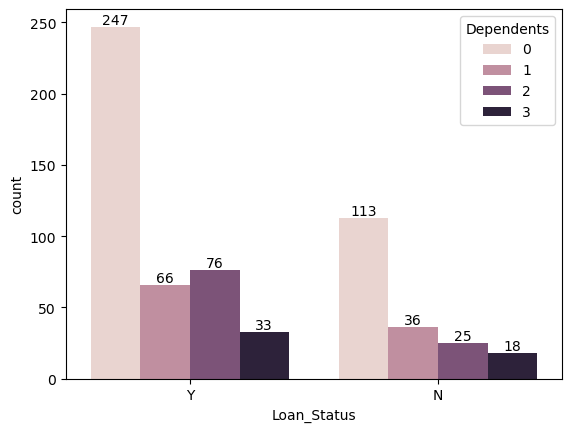

In [76]:
n=sb.countplot(x=df.Loan_Status,hue=df.Dependents)
n.bar_label(n.containers[0])
n.bar_label(n.containers[1])
n.bar_label(n.containers[2])
n.bar_label(n.containers[3])
plt.show()


**-Based on Above countplot:**

There are 422 Number of Dependents have Approved loan while
192 Have Denied.

***Investigate loan approval by education background.**

In [79]:
a=df.groupby(["Education","Loan_Status"]).size().reset_index(name='count')

In [80]:
a

,Education,Loan_Status,count
0,Graduate,N,140
1,Graduate,Y,340
2,Not Graduate,N,52
3,Not Graduate,Y,82


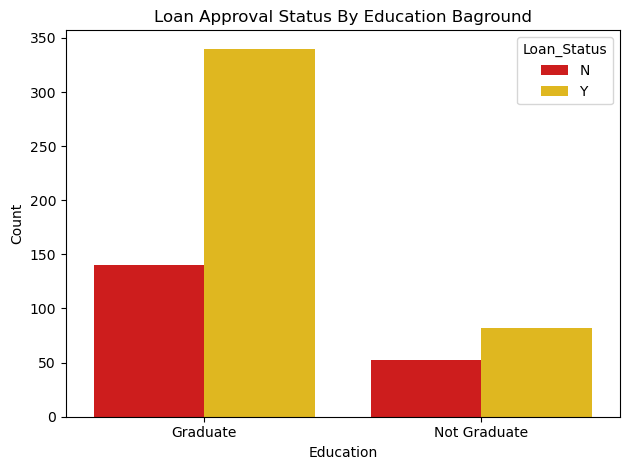

In [81]:
sb.barplot(a,x="Education",y="count",hue="Loan_Status",palette="hot")
plt.title('Loan Approval Status By Education Baground')
plt.xlabel('Education')
plt.ylabel('Count')
plt.tight_layout()

**Based on Above Graph :**

By Education Background there are Graduate and Ungraduate people.

In Graduate 340 peoples have assigned the loan & 140 are those who denied while In Non-Graduate 82 peoples are those who assign & 52 are those who denied.

***Check the impact of self-employment status on loan approval**

In [84]:
x=df.groupby(["Self_Employed","Loan_Status"]).size().reset_index(name="count")

In [85]:
x

,Self_Employed,Loan_Status,count
0,No,N,157
1,No,Y,343
2,Yes,N,35
3,Yes,Y,79


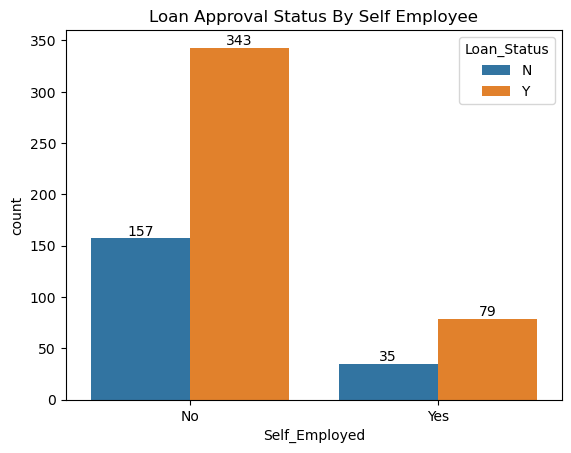

In [86]:
a=sb.barplot(x,x="Self_Employed",y="count",hue="Loan_Status")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("Loan Approval Status By Self Employee")
plt.show()

**Based On Above Information:**

Only 56 People those are Self employee who assigned Loan & 26 people who declined,
while 343 People are un-Employeed but assigned Loan & 157 People are denied. 

 **Task 4: Income and Loan Amount Analysis**


 ***Boxplot Hepls To Visualize the relation Between applicant income and loan approval**

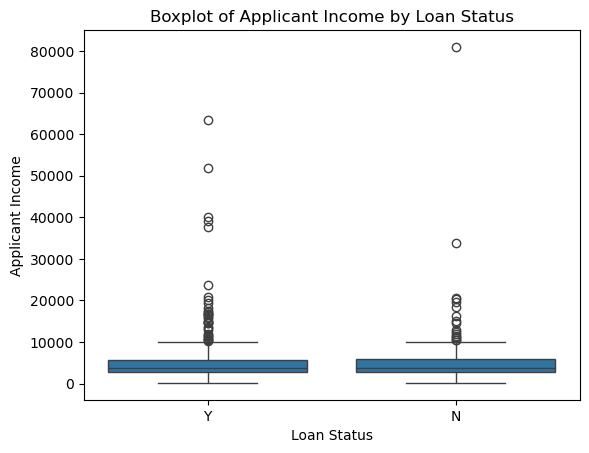

In [90]:
sb.boxplot(x=df.Loan_Status,y=df.ApplicantIncome)
plt.title('Boxplot of Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

**Based on Above:**

Only Applicant with Income under 70,000 have their Loan Granted while Those with Income Over 70,000 have not.

 ***Coapplicant Income influences Loan Approval**

In [93]:
approved = df[df['Loan_Status'] == 'Y']
rejected = df[df['Loan_Status'] == 'N']
print(approved.describe())
print(rejected.describe())


       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  422.000000       422.000000         422.000000  422.000000   
mean     0.751185      5384.068720        1504.516398  140.533175   
std      1.009309      5765.441615        1924.754855   87.444357   
min      0.000000       210.000000           0.000000    0.000000   
25%      0.000000      2877.500000           0.000000   99.000000   
50%      0.000000      3812.500000        1239.500000  125.000000   
75%      2.000000      5771.500000        2297.250000  160.000000   
max      3.000000     63337.000000       20000.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count        422.000000      422.000000  
mean         334.606635        0.895735  
std           78.057119        0.305967  
min            0.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000  


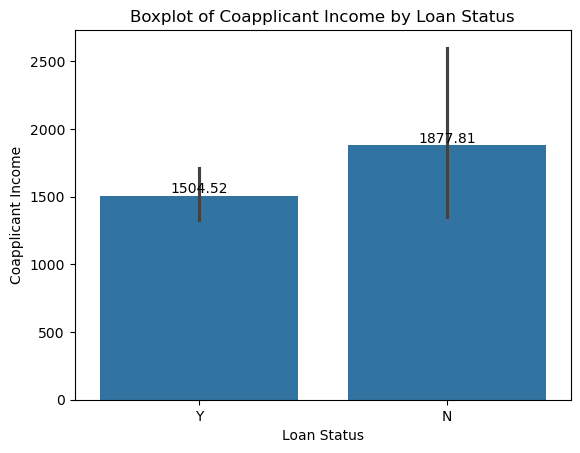

In [94]:
s=sb.barplot(x=df.Loan_Status,y=df.CoapplicantIncome)
s.bar_label(s.containers[0])
plt.title('Boxplot of Coapplicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()

**Based on Above:**
The accompanying bar graph shows that 1504.52 co-applicants have been granted loan approval, whereas 1877.81 co-applicants have not.

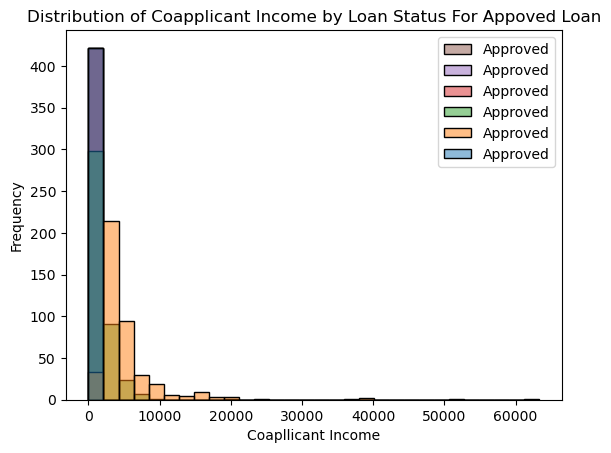

In [96]:
sb.histplot(approved, label="Approved", bins=30)
plt.title('Distribution of Coapplicant Income by Loan Status For Appoved Loan')
plt.xlabel('Coapllicant Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()


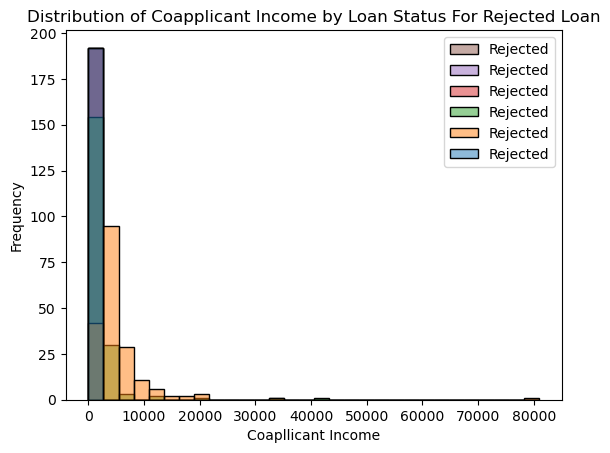

In [97]:
sb.histplot(rejected, label="Rejected", color='green', bins=30)
plt.title('Distribution of Coapplicant Income by Loan Status For Rejected Loan')
plt.xlabel('Coapllicant Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 ***Perform correlation analysis between applicant income, co-applicant income,
 and loan amount.**

In [99]:
correlation=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()

In [100]:
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.538290
CoapplicantIncome,-0.116605,1.000000,0.190377
LoanAmount,0.538290,0.190377,1.000000


**Correlation Shows the relation(Positive(+)/Negative(-)) Between Numeric Columns like (ApplicantIncome, CoapplicantIncome, LoanAmount).  
<<correlation Coeficient has range from -1 to 1.>>  
*1 indicates a perfect positive correlation.  
*-1 indicates a perfect negative correlation.  
*0 indicates no linear correlation.*****


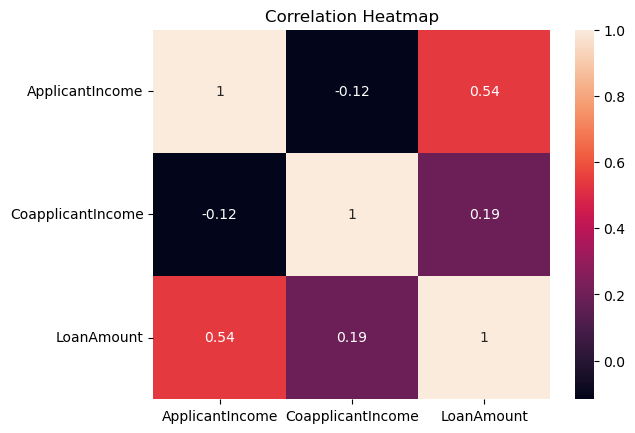

In [103]:
sb.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()


**Above Heatmap use to represent the value of correlation matrix.**  
**(Annot=True)** is use to represent cell values with text.

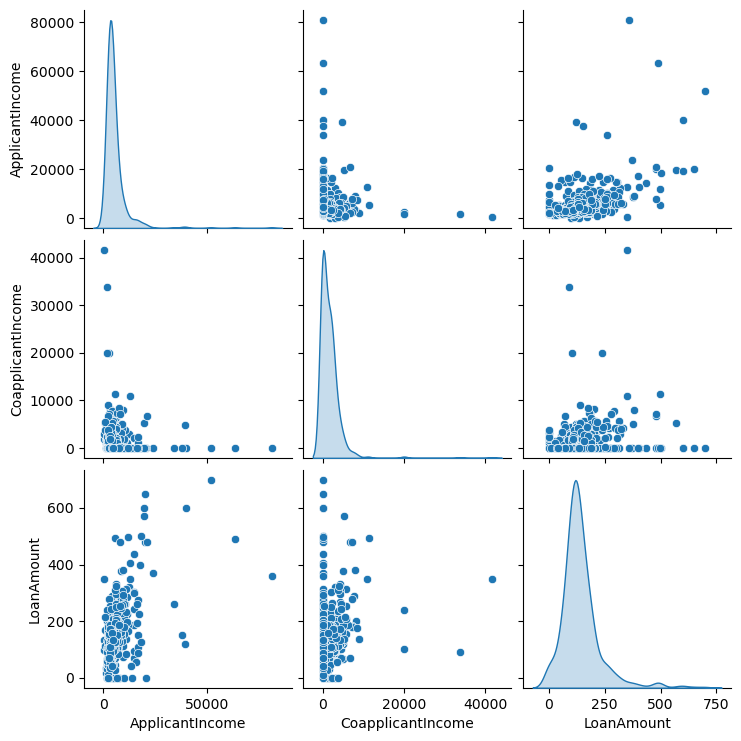

In [105]:
sb.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']],diag_kind='kde')

***loan amounts requested by different demographic groups like gender,
 marital status, education.**

In [107]:
a= df.groupby(['Gender', 'Married', 'Education'])['LoanAmount'].mean().reset_index()

In [108]:
a

,Gender,Married,Education,LoanAmount
0,Female,No,Graduate,118.202899
1,Female,No,Not Graduate,98.785714
2,Female,Yes,Graduate,175.142857
3,Female,Yes,Not Graduate,121.714286
4,Male,No,Graduate,140.070707
5,Male,No,Not Graduate,101.419355
6,Male,Yes,Graduate,156.985560
7,Male,Yes,Not Graduate,117.792683


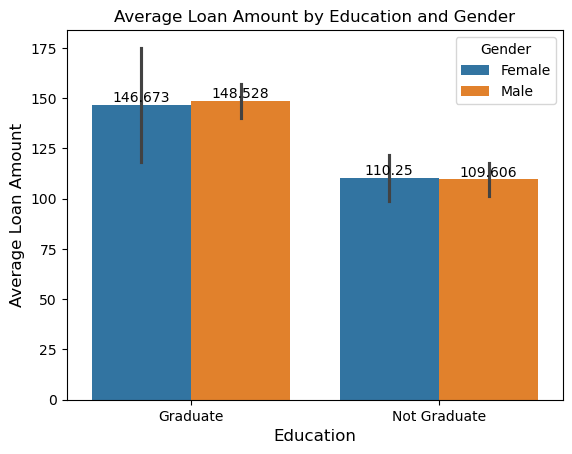

In [109]:
c=sb.barplot( a,x="Education", y="LoanAmount", hue="Gender")
c.bar_label(c.containers[0])
c.bar_label(c.containers[1])
plt.title('Average Loan Amount by Education and Gender')
plt.xlabel('Education', fontsize=12)
plt.ylabel('Average Loan Amount', fontsize=12)
plt.legend(title='Gender')
plt.show()

**Above Information Shows :-  
The Loan Amount By Different demographic Groups where By Education Background Graduate people who are male have average Loan Amount is 154.125 & those are Female is 139.291
while not Graduate people  Who are male have Loan Amount is 115.121 & for female is 114.859.**

**Task 5: Credit History and Loan Term Analysis**

***Examine the loan approval rate for applicants with different credit histories**

In [114]:
loan_approval_rate=(df.groupby("Loan_Status")["Credit_History"].mean()*100)


In [115]:
loan_approval_rate

Loan_Status
N    50.520833
Y    89.573460
Name: Credit_History, dtype: float64

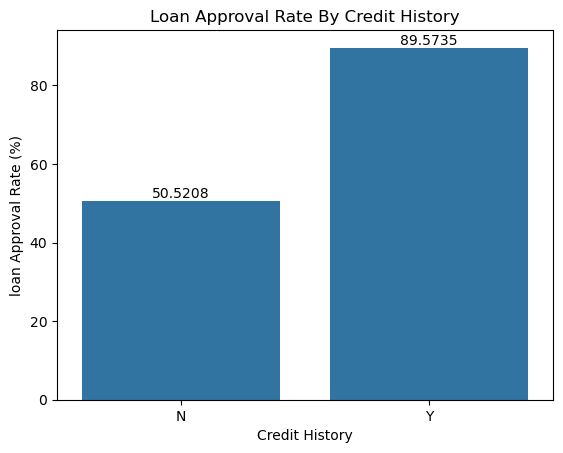

In [116]:
n=sb.barplot(x=loan_approval_rate.index,y=loan_approval_rate.values)
n.bar_label(n.containers[0])
plt.title("Loan Approval Rate By Credit History")
plt.xlabel("Credit History")
plt.ylabel("loan Approval Rate (%)")
plt.show()

**Based on Above Information:**
The Loan Approval Rate for those who Has Credit Loan is Approximately 89 % where as for those who Have not Credited Loan the Loan Approval Rate is 50%.  

***Analyze the relationship between loan term (Loan_Amount_Term) and loan approval rate.**

C:\Users\asus\AppData\Local\Temp\ipykernel_36964\3768945690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sb.barplot(df,x="Loan_Status",y="Loan_Amount_Term",palette="rocket")


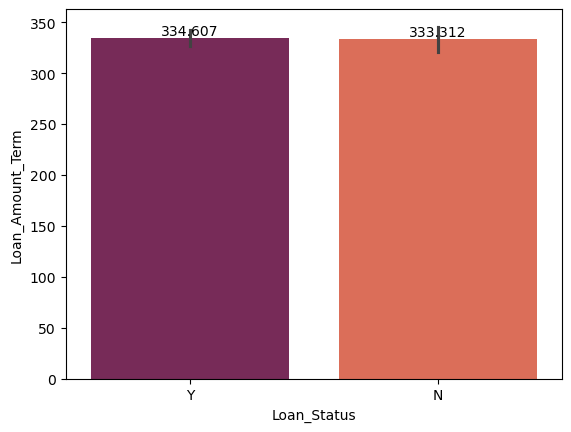

In [119]:
a=sb.barplot(df,x="Loan_Status",y="Loan_Amount_Term",palette="rocket")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.show()

**The Above Barplot Shows Relation Between the Loan Amount term And the Laon Status.**  
The Loan Amount Term for Applicant who Approved Loan is about **341** while Loan Term For Who could not Approved Loan is About **344**.

***Investigate the interaction between credit history and loan term.**

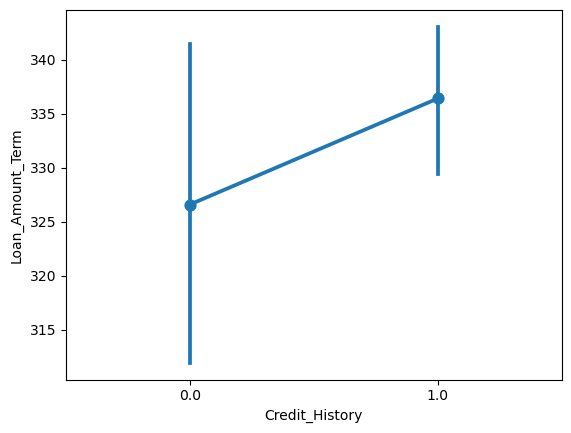

In [123]:
sb.pointplot(x=df.Credit_History,y=df.Loan_Amount_Term)
plt.show()

**The pointplot Shows min,max And Min itself in Single Graph.**  
**Based on Above Information:**
The Loan Amount Term for those who Has Credit Loan is Average 326 where as for those who Have not Credited Loan the Loan Amount Term is 336.

**Task 6: Property Area and Loan Approval**

***The distribution of loan approvals across different property areas(Urban, Semiurban, Rural).**

In [128]:
property_loan_status = df.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='count')


In [129]:
property_loan_status

,Property_Area,Loan_Status,count
0,Rural,N,69
1,Rural,Y,110
2,Semiurban,N,54
3,Semiurban,Y,179
4,Urban,N,69
5,Urban,Y,133


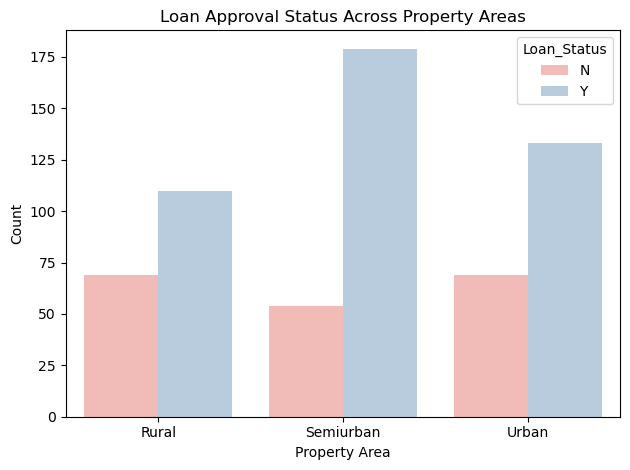

In [130]:
sb.barplot(property_loan_status,x="Property_Area",y="count",hue="Loan_Status",palette="Pastel1")
plt.title('Loan Approval Status Across Property Areas')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.tight_layout()

**The Barplot helps to visualize distribution of Loan Approval across different Property Area.**

***To Investigate if property area has a significant impact on loan amounts
 requested.**  
 we can visualize the distribution of loan amounts (LoanAmount) across different property areas (Property_Area) using box plots or violin plots. 

C:\Users\asus\AppData\Local\Temp\ipykernel_36964\3912979964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(df, x='Property_Area', y='LoanAmount', palette='Set2')


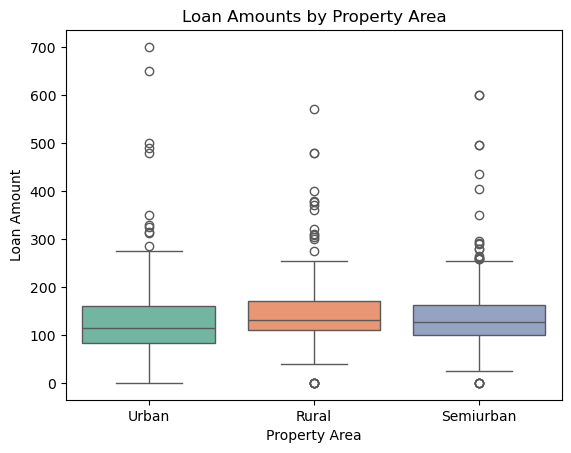

In [133]:
sb.boxplot(df, x='Property_Area', y='LoanAmount', palette='Set2')
plt.title('Loan Amounts by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

***A box plot is used to visualize the spread of LoanAmount for each category in Property_Area.**
